In [10]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import os

In [11]:
os.chdir('C:/Users/C10381149/OneDrive - Technological University Dublin/Documents/Python/Datasets/')

In [12]:
iris=pd.read_csv('iris.csv')
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','type']

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
features=['sepal_length','sepal_width','petal_length','petal_width']
X = iris[features]
scaler=MinMaxScaler()
X = scaler.fit_transform(X)
y = iris['type']

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

Plot the training and test accuracy for number of neighbors ranging from 1 to 100.

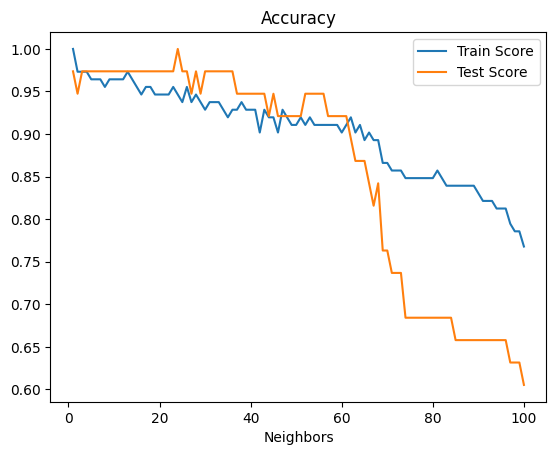

In [16]:
neighbors=[]
train_score=[]
test_score=[]
for i in range(1,101):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    neighbors.append(i)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

df=pd.DataFrame({"Neighbors":neighbors, "Train Score": train_score, "Test Score": test_score})
df.plot(x="Neighbors", title="Accuracy")
plt.show()

Use the model to predict the classification of a new entry.

In [17]:
vals=pd.Series([0.01*i for i in range(101)])
X_new = np.array([[
    vals.sample().iloc[0,],
    vals.sample().iloc[0,],
    vals.sample().iloc[0,],
    vals.sample().iloc[0,]
]])

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn.predict(X_new)

array(['versicolor'], dtype=object)